In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Paired')
%load_ext autoreload


%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
elections = pd.read_csv("./data/volby/volby_sociodemo.csv",sep=";")
elections.shape


(14271, 51)

In [36]:
elections['obec'] =  elections['obec'].astype(object)
elections['sl11zeny']  = elections['sl11obyvatel'] - elections['sl11muzi']


In [37]:
duplicate_rows = elections.duplicated().sum()
duplicate_districts = elections['obec_okrsek'].duplicated().sum()
print(f"Duplicated rows: {duplicate_rows}")
print(f"Duplicated districts: {duplicate_districts}")



Duplicated rows: 0
Duplicated districts: 0


In [38]:
elections =  elections.set_index(elections['obec_okrsek'])

In [39]:
def to_ratio(df, col, base):
    df[col+'_ratio'] = df[col]/df[base]

In [40]:
for col in ['par21vsezn', 'par21spd',
       'par21spolu', 'par21pirsta', 'par21ano', 'par21soc', 'par21pri',
       'par21ksc', 'par21zel', 'par21tss']:
       to_ratio(elections, col, 'par21phcelkem')

for col in ['par17vsezn','par17ano', 'par17ods', 'par17top', 'par17kdu', 'par17spd',
       'par17soc', 'par17pir', 'par17sta', 'par17zel', 'par17ksc', 'par17svo']:
       to_ratio(elections, col, 'par17phcelkem')
for col in ['sl11muzi', 'sl11rozv', 'sl11deti', 'sl11seni',
       'sl11kat', 'sl11rom', 'sl11vs', 'sl11vos', 'sl11nast', 'sl11strm',
       'sl11strb', 'sl11zakl', 'sl11zam', 'sl11pod', 'sl11nezam',
       'sl11neprduch']:
       to_ratio(elections, col, 'sl11obyvatel')


In [41]:
elections['vel.obce_cat']  = pd.cut(elections['vel.obce'], [0,500,1000,5000,10000,20000,50000,100000, float("inf")])
translation = {
    '(0.0, 500.0]' : '500-',
    '(500.0, 1000.0]':'500-1k',
    '(1000.0, 5000.0]':'1-5k',
    '(5000.0, 10000.0]':'5-10k',
    '(10000.0, 20000.0]':'10-20k',
    '(20000.0, 50000.0]':'20-50k',
    '(50000.0, 100000.0]':'50-100k',
    '(100000.0, inf]':'100k+'
}

elections['vel.obce_cat'] = elections['vel.obce_cat'].astype(str).apply(lambda x: translation[x])

In [42]:
elections.to_csv("./data/volby/dataset_extended.csv",index=True,sep=";")

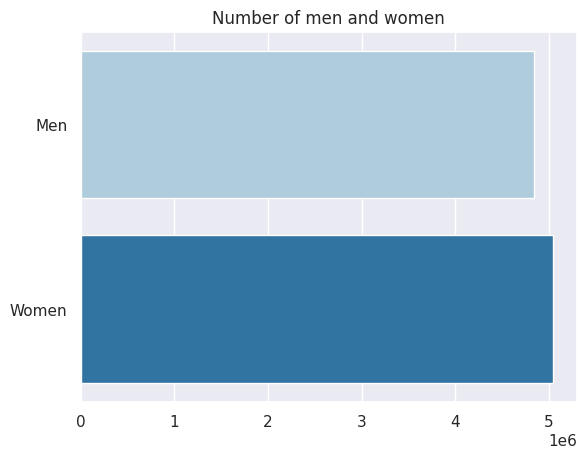

In [43]:
import scripts 
elections_extended = scripts.load_extended_dataset("./data/volby/dataset_extended.csv")
scripts.plot_gender_counts(elections_extended);


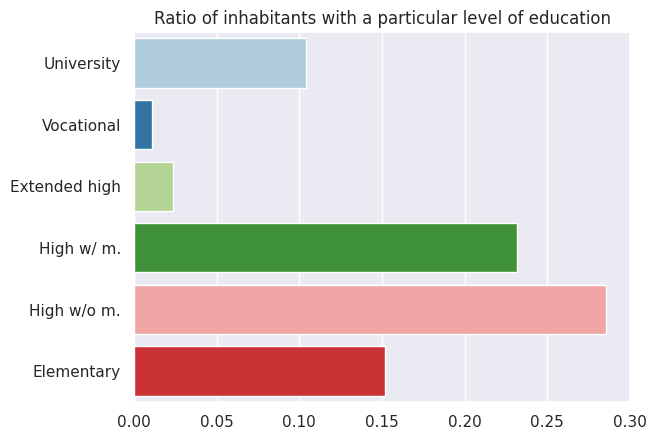

In [44]:
scripts.plot_edu_count(elections_extended);

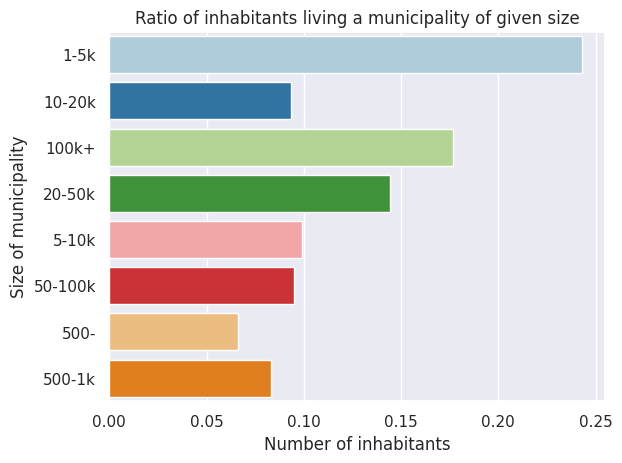

In [45]:
scripts.plot_municipality_size_ratio(elections_extended);

In [46]:
elections_extended.groupby("vel.obce_cat")["sl11obyvatel"].sum()

vel.obce_cat
1-5k       2399926
10-20k      923771
100k+      1744359
20-50k     1428168
5-10k       979599
50-100k     936796
500-        651911
500-1k      819641
Name: sl11obyvatel, dtype: int64

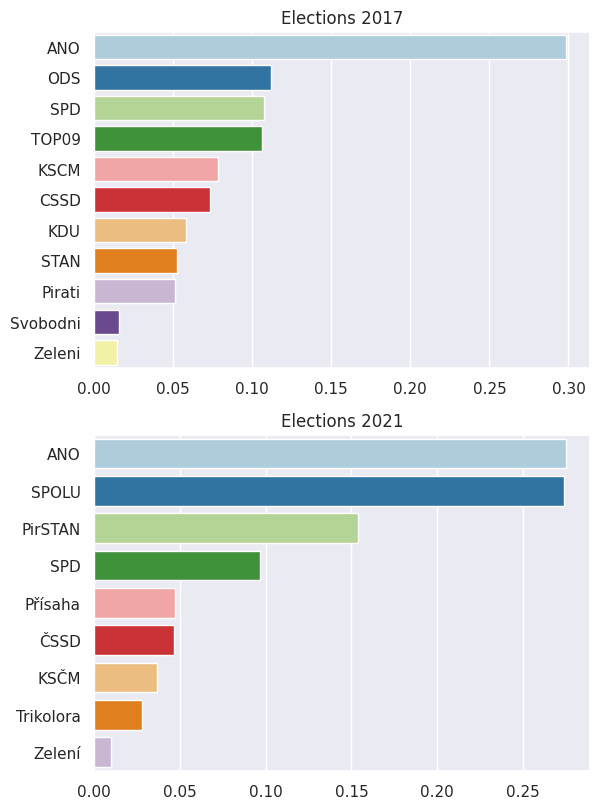

In [47]:

scripts.plot_parl_elections(elections_extended);


In [48]:
elections_extended['vel.obce_cat'].astype("category")


obec_okrsek
500011_1      1-5k
500011_2      1-5k
500011_3      1-5k
500020_1      1-5k
500020_2      1-5k
             ...  
599948_4      1-5k
599956_1      1-5k
599964_1    500-1k
599999_1      1-5k
599999_2      1-5k
Name: vel.obce_cat, Length: 14271, dtype: category
Categories (8, object): ['1-5k', '10-20k', '100k+', '20-50k', '5-10k', '50-100k', '500-', '500-1k']

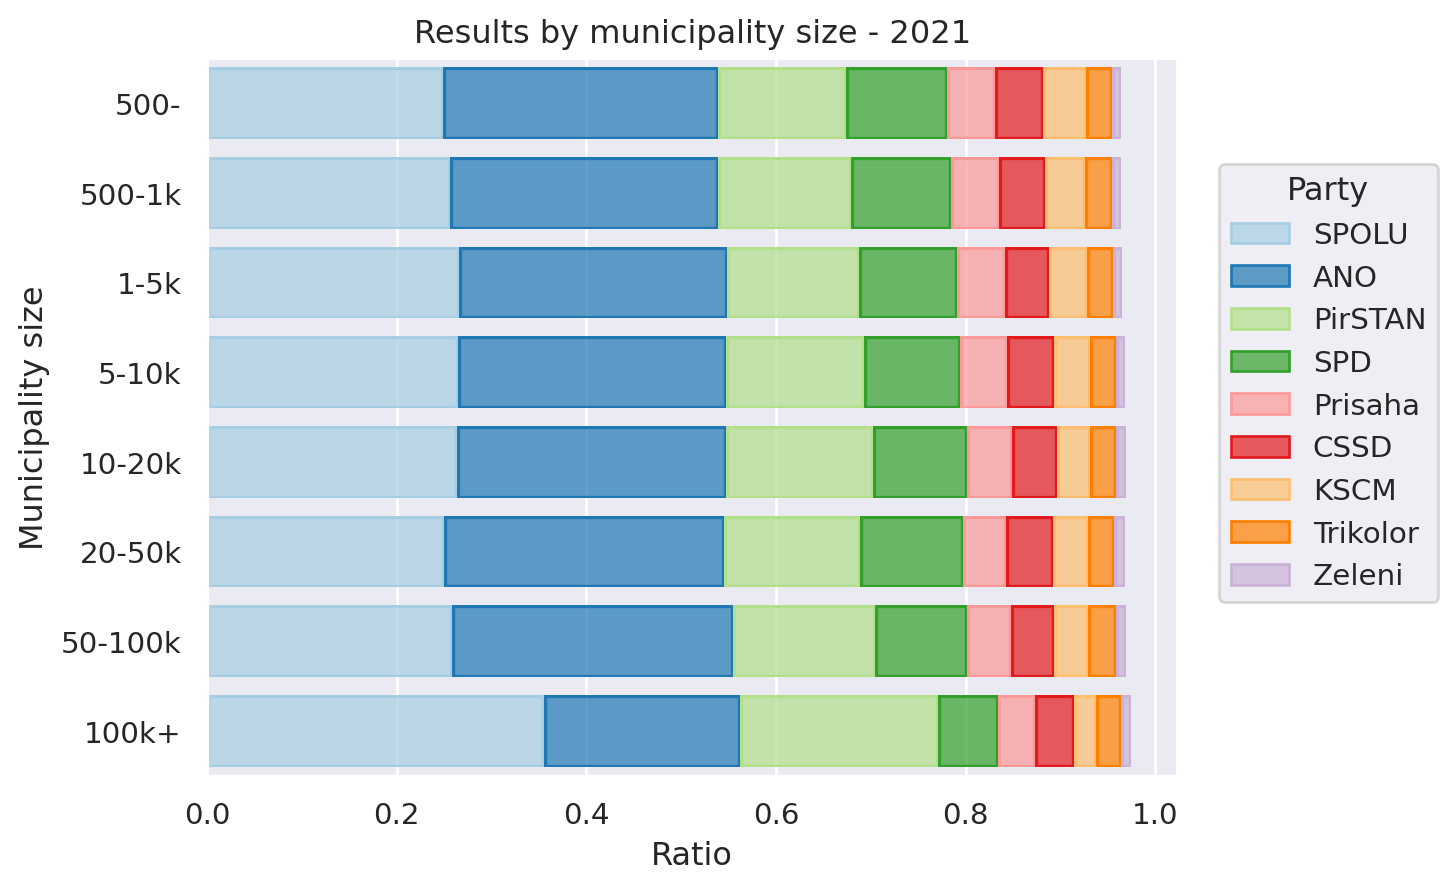

In [70]:
scripts.elections2021_size_plot(elections_extended)

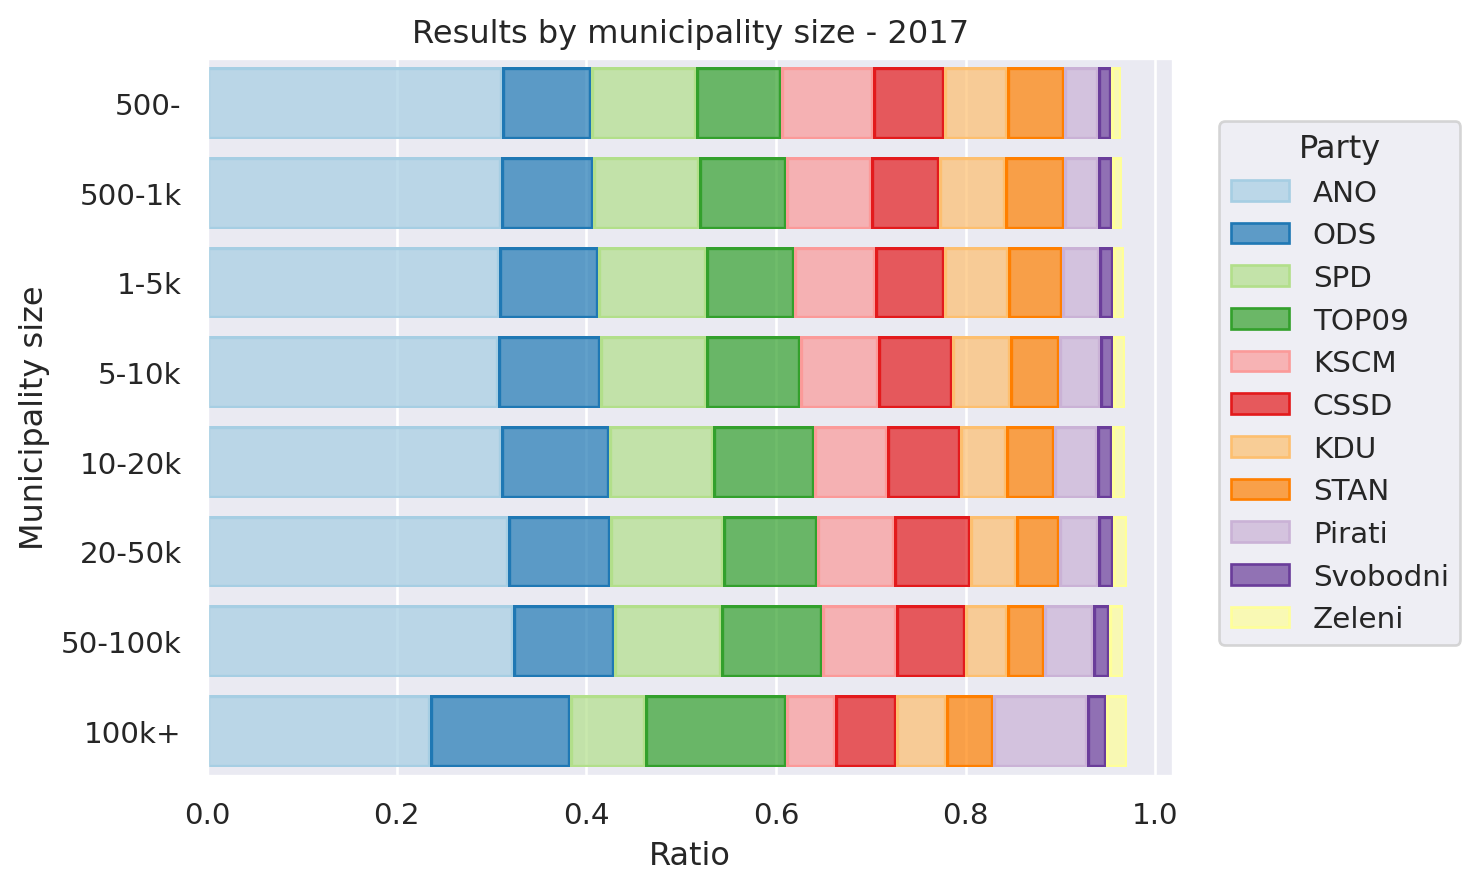

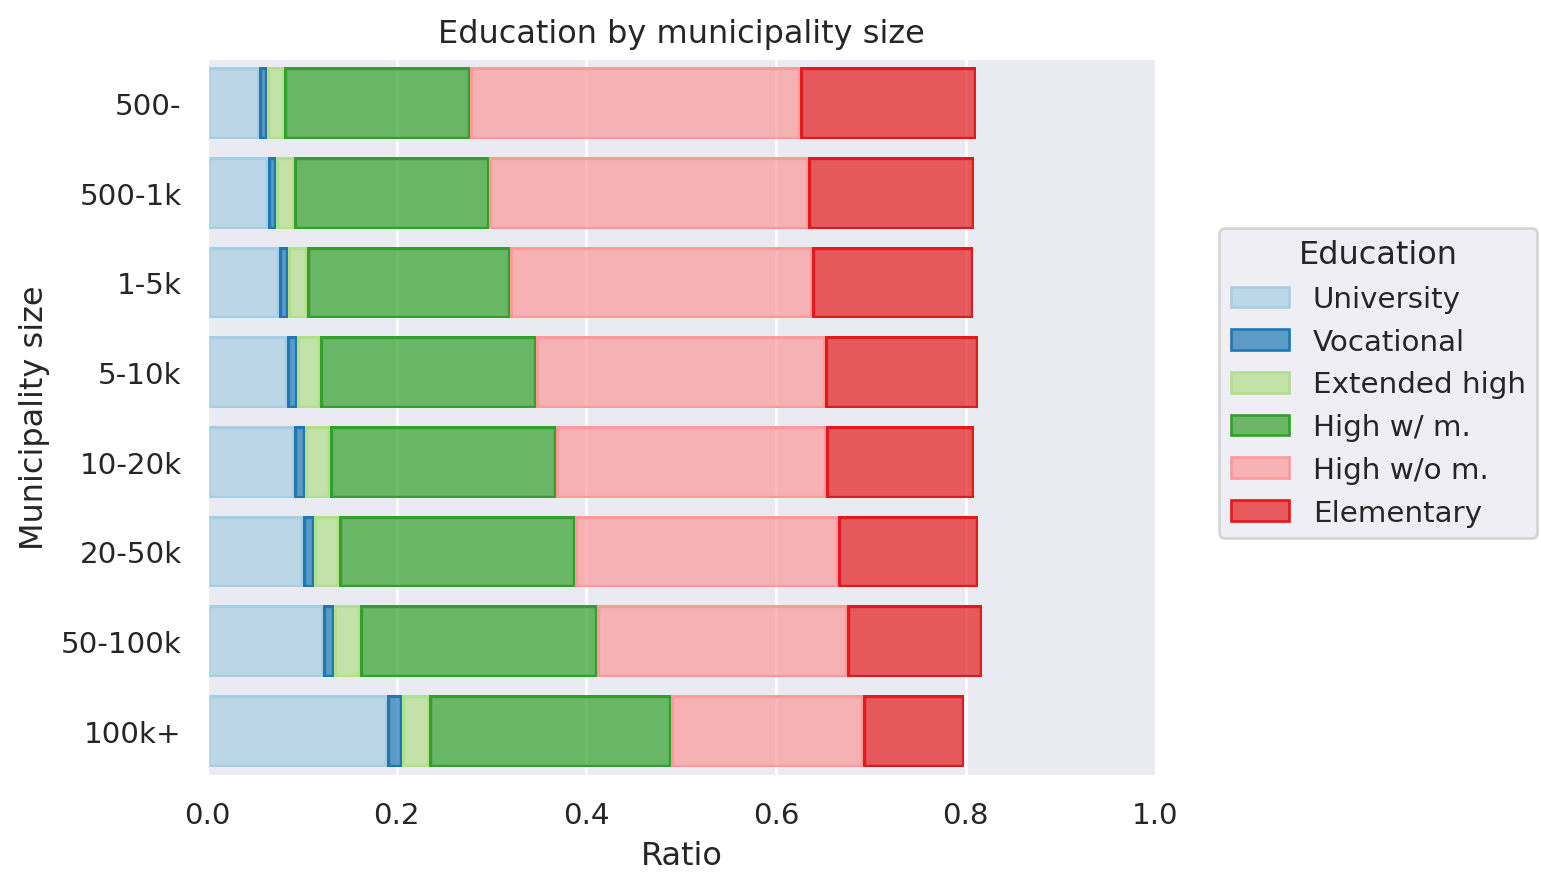

In [51]:
scripts.

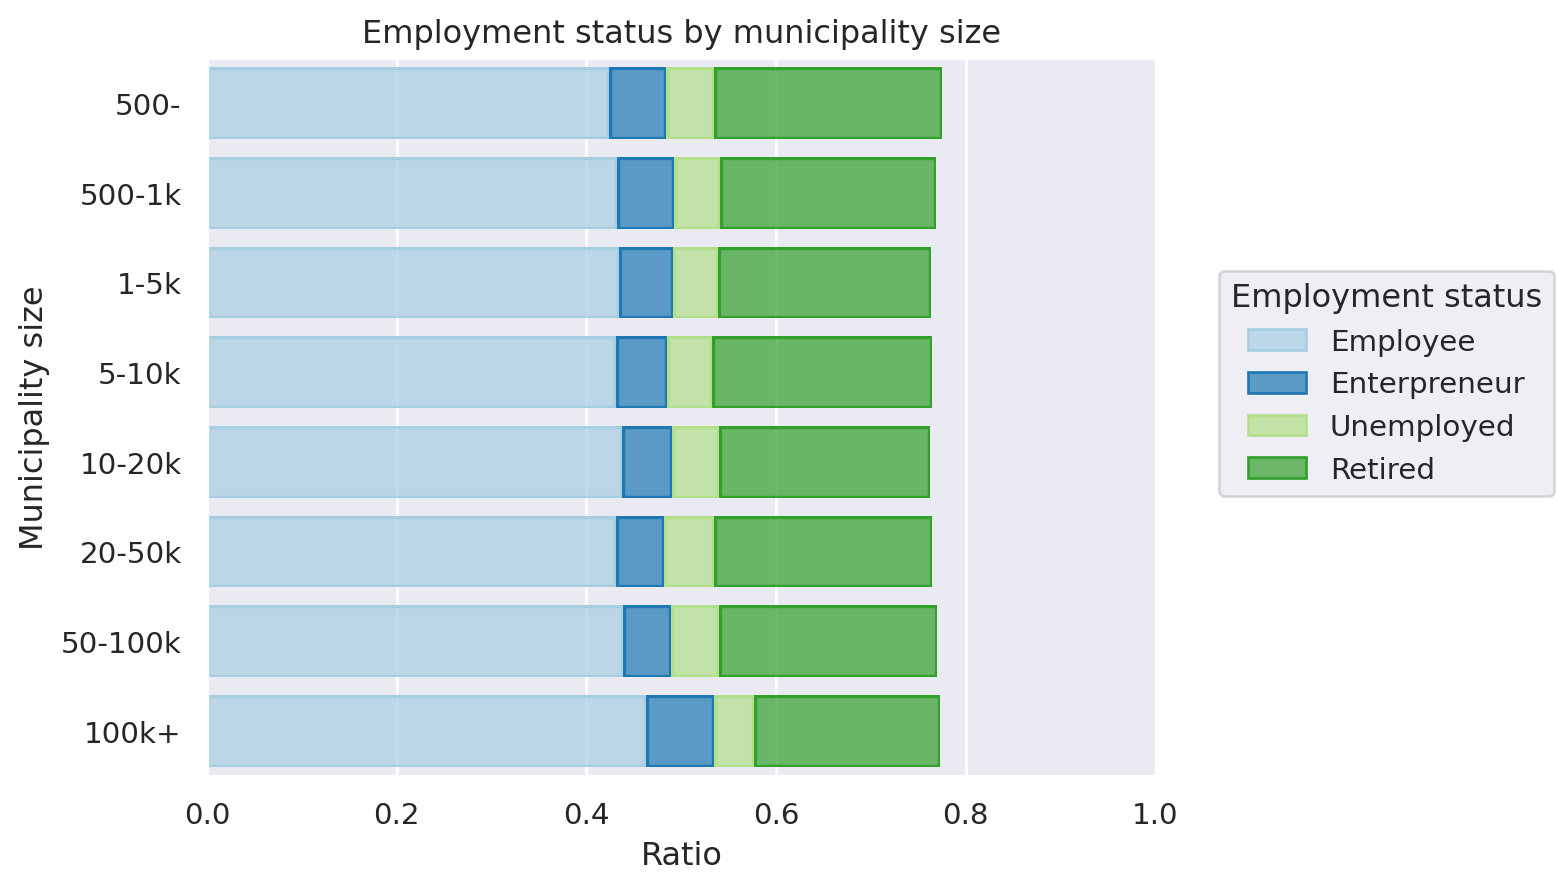

In [64]:
scripts.box_cross_size_plot(elections_extended,"sl11obyvatel",{
        "sl11zam": "Employee",
        "sl11pod": "Enterpreneur",
        "sl11nezam": "Unemployed",
        "sl11neprduch": "Retired",
    }).label(
            x="Ratio",
            y="Municipality size",
            title="Employment status by municipality size",
            color="Employment status",
        ).limit(x=(0,1.0)).theme(scripts.object_theme)

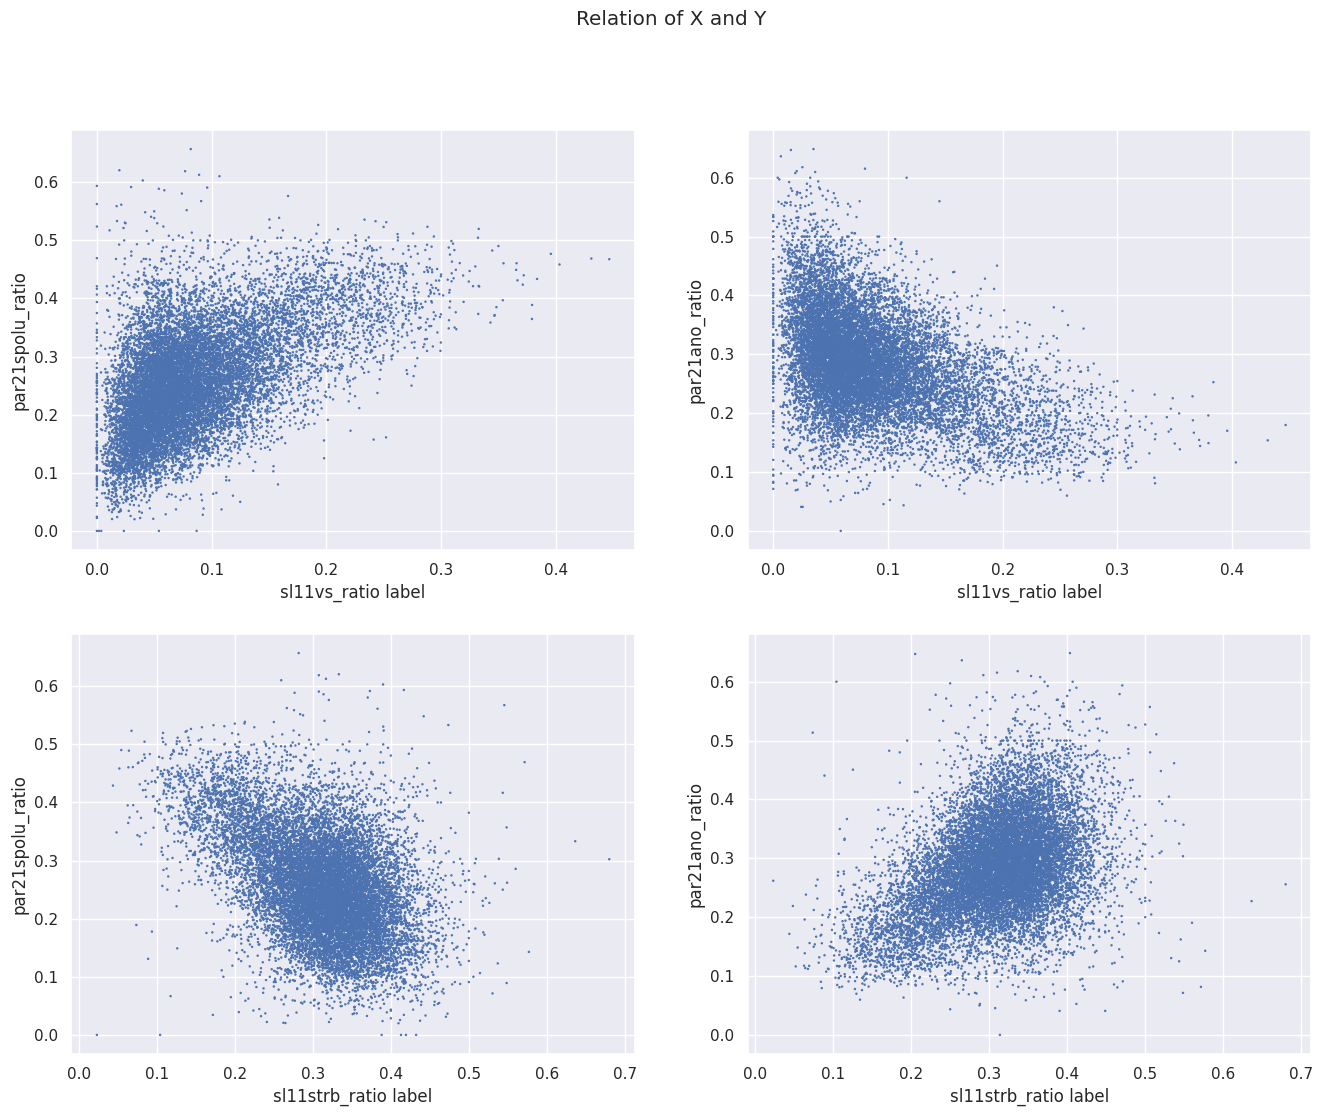

In [76]:

xs=["sl11vs_ratio","sl11strb_ratio"]
ys=["par21spolu_ratio","par21ano_ratio"]
scripts.create_jointplot(elections_extended, xs,ys,[[{"x":f"{x} label"} for y in ys] for x in xs]);

In [57]:
sns.axes_style("darkgrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}